In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

170498071/170498071 [==============================] - 259s 2us/step
Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

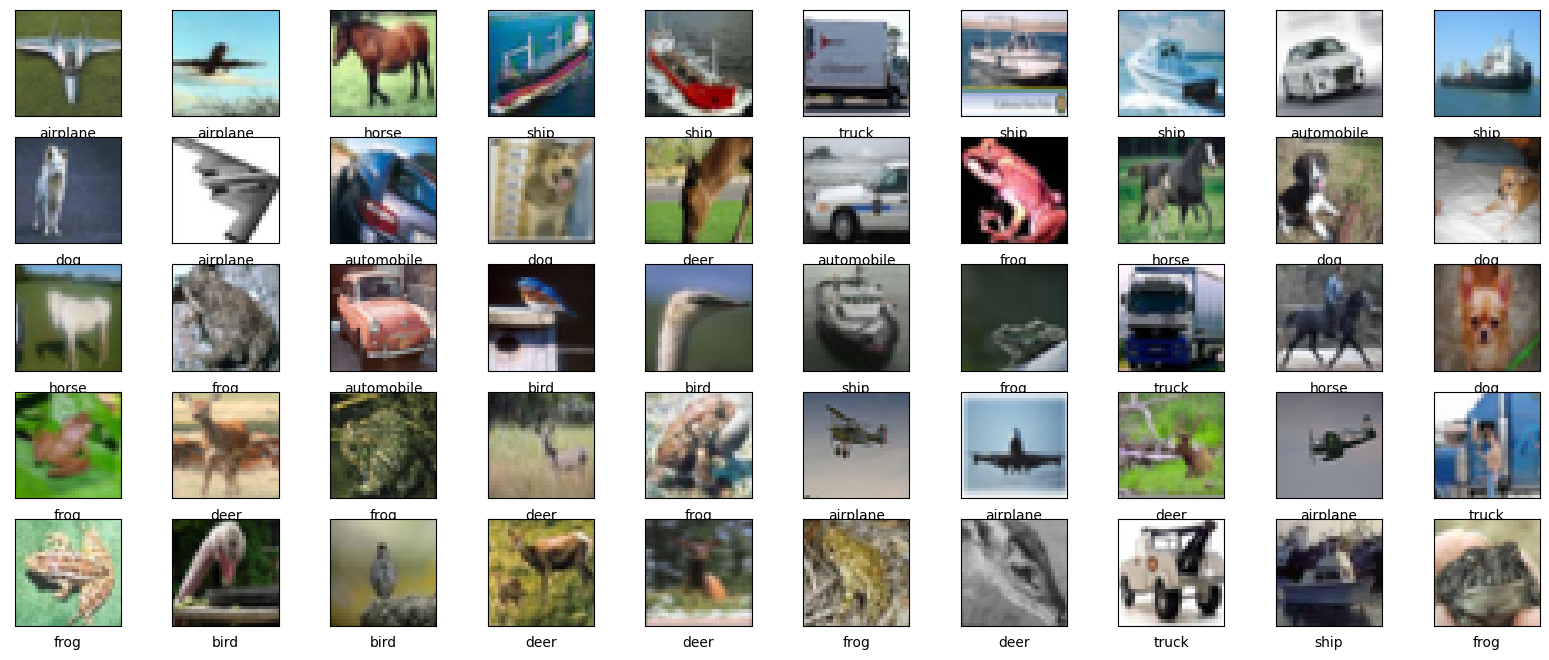

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    idx = np.random.randint(0,1000)
    plt.imshow(x_train[idx])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[y_train[idx][0]])
    
plt.show()

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [7]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Epoch 1/25
1094/1094 [==============================] - 34s 29ms/step - loss: 1.6984 - accuracy: 0.3740 - val_loss: 1.4375 - val_accuracy: 0.4837
Epoch 2/25
1094/1094 [==============================] - 28s 26ms/step - loss: 1.3471 - accuracy: 0.5163 - val_loss: 1.2624 - val_accuracy: 0.5433
Epoch 3/25
1094/1094 [==============================] - 29s 26ms/step - loss: 1.1969 - accuracy: 0.5745 - val_loss: 1.1762 - val_accuracy: 0.5849
Epoch 4/25
1094/1094 [==============================] - 29s 26ms/step - loss: 1.0943 - accuracy: 0.6126 - val_loss: 1.1087 - val_accuracy: 0.6117
Epoch 5/25
1094/1094 [==============================] - 29s 26ms/step - loss: 1.0262 - accuracy: 0.6377 - val_loss: 1.0742 - val_accuracy: 0.6271
Epoch 6/25
1094/1094 [==============================] - 29s 27ms/step - loss: 0.9599 - accuracy: 0.6630 - val_loss: 1.0451 - val_accuracy: 0.6363
Epoch 7/25
1094/1094 [==============================] - 34s 31ms/step - loss: 0.9070 - accuracy: 0.6776 - val_loss: 1.0398 -

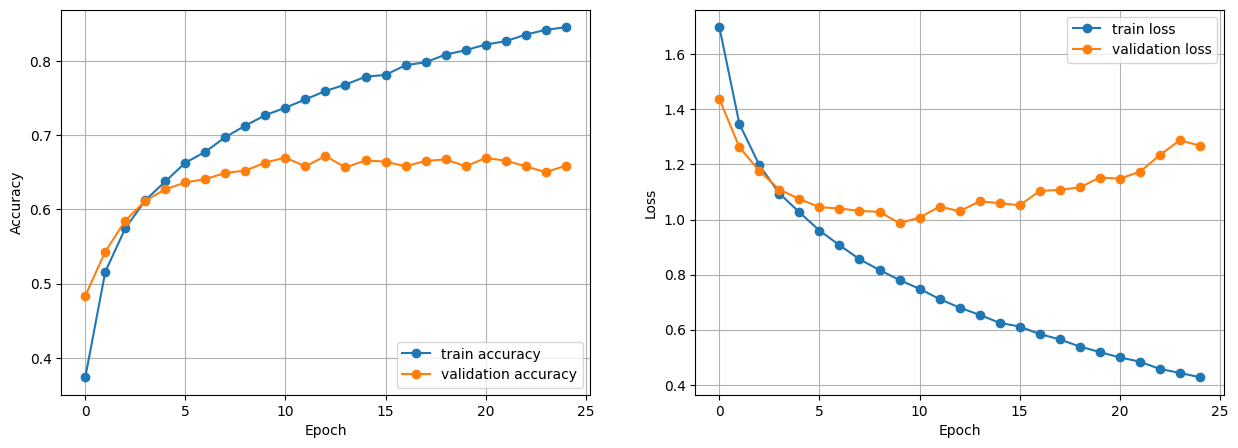

In [8]:
h = model.fit(x=x_train, y=y_train, epochs=25, validation_split=0.3, batch_size=32)

print("#"*30)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


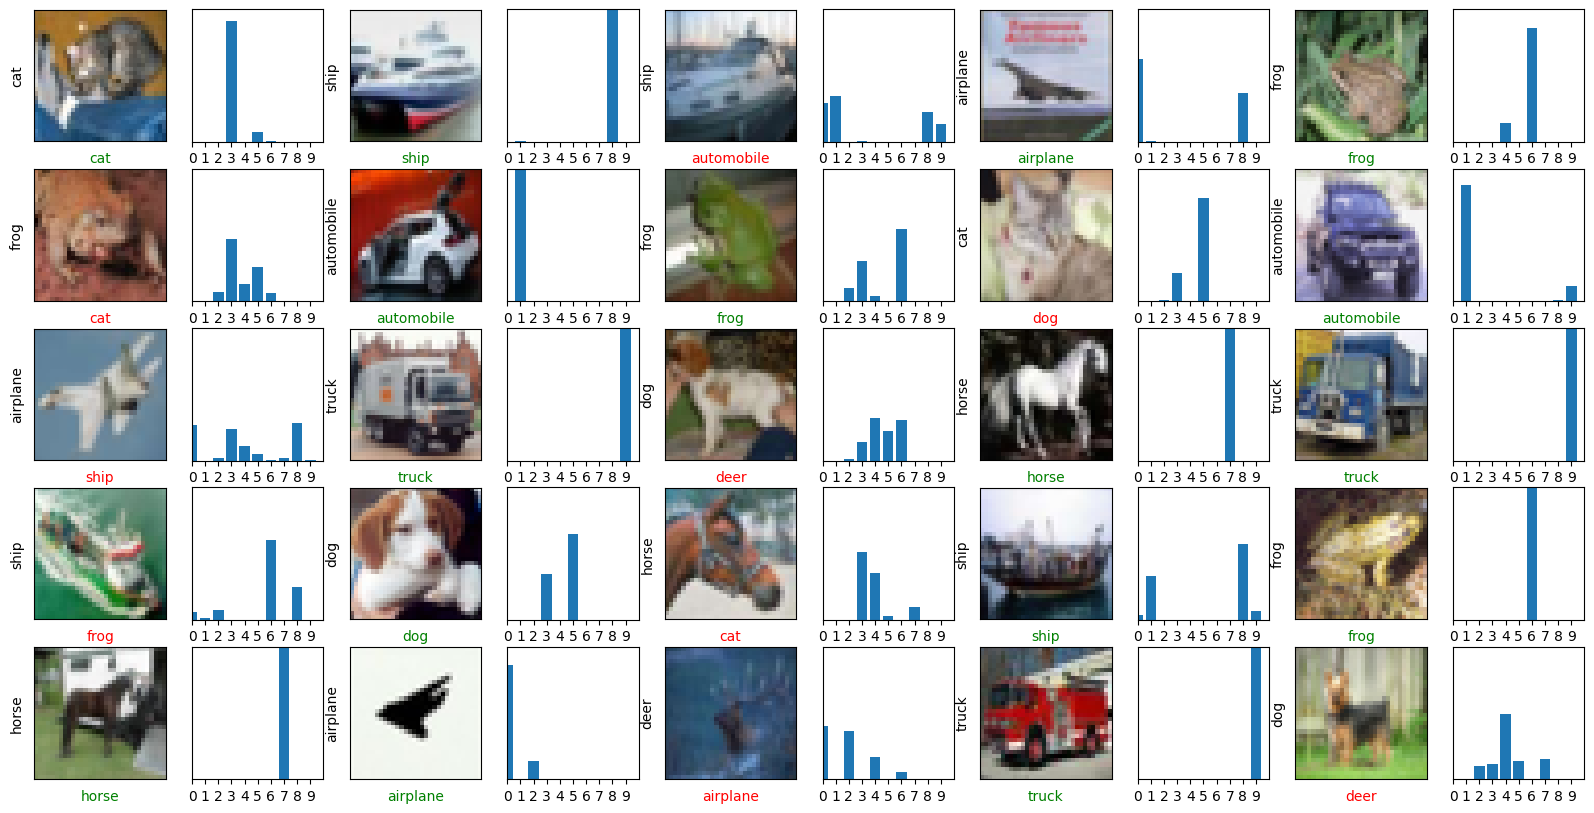

In [10]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[y_test[i][0]])
    if y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')
        
    
    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
    
plt.show()
